## **第 2 回　株価データ**

---
---
- 添付した pdf ファイルを参照
- [Google 翻訳](https://translate.google.com/?hl=ja&tab=TT)
- Stable Diffusion
  - [Hugging Face](https://huggingface.co/) -> Space -> stable で検索
    - [stable-diffusion-xl](https://huggingface.co/spaces/prodia/stable-diffusion-xl)
    - [Stable Diffusion 2-1](https://huggingface.co/spaces/stabilityai/stable-diffusion)
  - [mage.space](https://www.mage.space/)
  - [DreamStudio](https://beta.dreamstudio.ai/generate)

---
---
#### **課題**
1. 添付したファイル data/AAPL.csv を pandas の DataFrame で表示せよ。index_col の値、index のフォーマットに注意すること。

解答例

<img src="figs/1.jpg" width="600px">

In [2]:
import pandas as pd

file_path = '/Users/shishishikakou/Downloads/データサイエンス特論/02/data/AAPL.csv'
df_aapl = pd.read_csv(file_path, index_col='Date', parse_dates=True)

# DataFrame を表示
df_aapl.head()


,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,38.722500,39.712502,38.557499,39.480000,148158800
2019-01-03,35.994999,36.430000,35.500000,35.547501,365248800
2019-01-04,36.132500,37.137501,35.950001,37.064999,234428400
2019-01-07,37.174999,37.207500,36.474998,36.982498,219111200
2019-01-08,37.389999,37.955002,37.130001,37.687500,164101200


2. 終値（Close）を 72 日ごとに区切った 14 区間に対して、平均値、分散、自己共分散（ラグが 0, 10, 20, 30, 40, 50, 60, 70 の場合）を計算して pandas の DataFrame でまとよ。その後、matplotlib を使って、平均値のグラフ、分散のグラフ、自己共分散のグラフの 3 つのグラフで可視化せよ。自己共分散は、同一のデータセットにおける異なる時点間の共分散である。時系列データ $X_t$ のラグ $k$ の自己共分散 $\gamma(k)$ を以下の式で定義する：
$$
\gamma(k) = \frac{1}{N} \sum_{t=1}^{N-k} (X_t - \bar{X})(X_{t+k} - \bar{X})\ .
$$
ここで、
   - $N$ はそれぞれの区間のデータ数（ここでは 72）
   - $\bar{X}$ はそれぞれの区間でのデータの平均
   - $X_t$ は時点 $t$ におけるデータの値
   - $k$ はラグ（遅延）

<img src="figs/2.jpg" width="800px">

解答例

<img src="figs/3.jpg" width="900px">

<img src="figs/4.jpg" width="900px">

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# 72日ごとにデータを区切る
window_size = 72
num_intervals = len(df_aapl) // window_size

# 計算結果を保存するためのDataFrameを作成
columns = ['Mean', 'Variance']
lags = [0, 10, 20, 30, 40, 50, 60, 70]
for lag in lags:
    columns.append(f'Autocovariance_Lag_{lag}')

results_df = pd.DataFrame(columns=columns)

# 各区間に対して計算
for i in range(num_intervals):
    start_idx = i * window_size
    end_idx = (i + 1) * window_size
    interval_data = df_aapl['Close'].iloc[start_idx:end_idx]
    
    # 平均と分散を計算
    mean = np.mean(interval_data)
    variance = np.var(interval_data)
    
    # 自己共分散を計算
    autocovariances = []
    N = len(interval_data)
    for lag in lags:
        sum_term = 0
        for t in range(N - lag):
            sum_term += (interval_data.iloc[t] - mean) * (interval_data.iloc[t + lag] - mean)
        autocovariance = sum_term / N
        autocovariances.append(autocovariance)
    
    # 結果を保存
    results_df.loc[f'Interval_{i+1}'] = [mean, variance] + autocovariances

# 結果のDataFrameを表示
results_df.head()



,Mean,Variance,Autocovariance_Lag_0,Autocovariance_Lag_10,Autocovariance_Lag_20,Autocovariance_Lag_30,Autocovariance_Lag_40,Autocovariance_Lag_50,Autocovariance_Lag_60,Autocovariance_Lag_70
Interval_1,43.472430,15.463919,15.463919,8.125202,1.884163,-0.701105,-3.720350,-6.700704,-5.234267,-1.043583
Interval_2,49.307674,6.102476,6.102476,1.837900,-2.322837,-2.277836,-1.331170,0.367127,0.746876,0.082173
Interval_3,55.519097,17.384611,17.384611,8.582000,2.568462,-1.595032,-4.369113,-6.755423,-5.527618,-0.698864
Interval_4,73.288542,34.846998,34.846998,22.998057,7.275659,-8.311388,-15.652128,-13.991571,-8.231298,-0.705220
Interval_5,70.990729,45.551091,45.551091,21.897088,0.148673,-11.977419,-19.567298,-12.390943,0.435023,0.495553


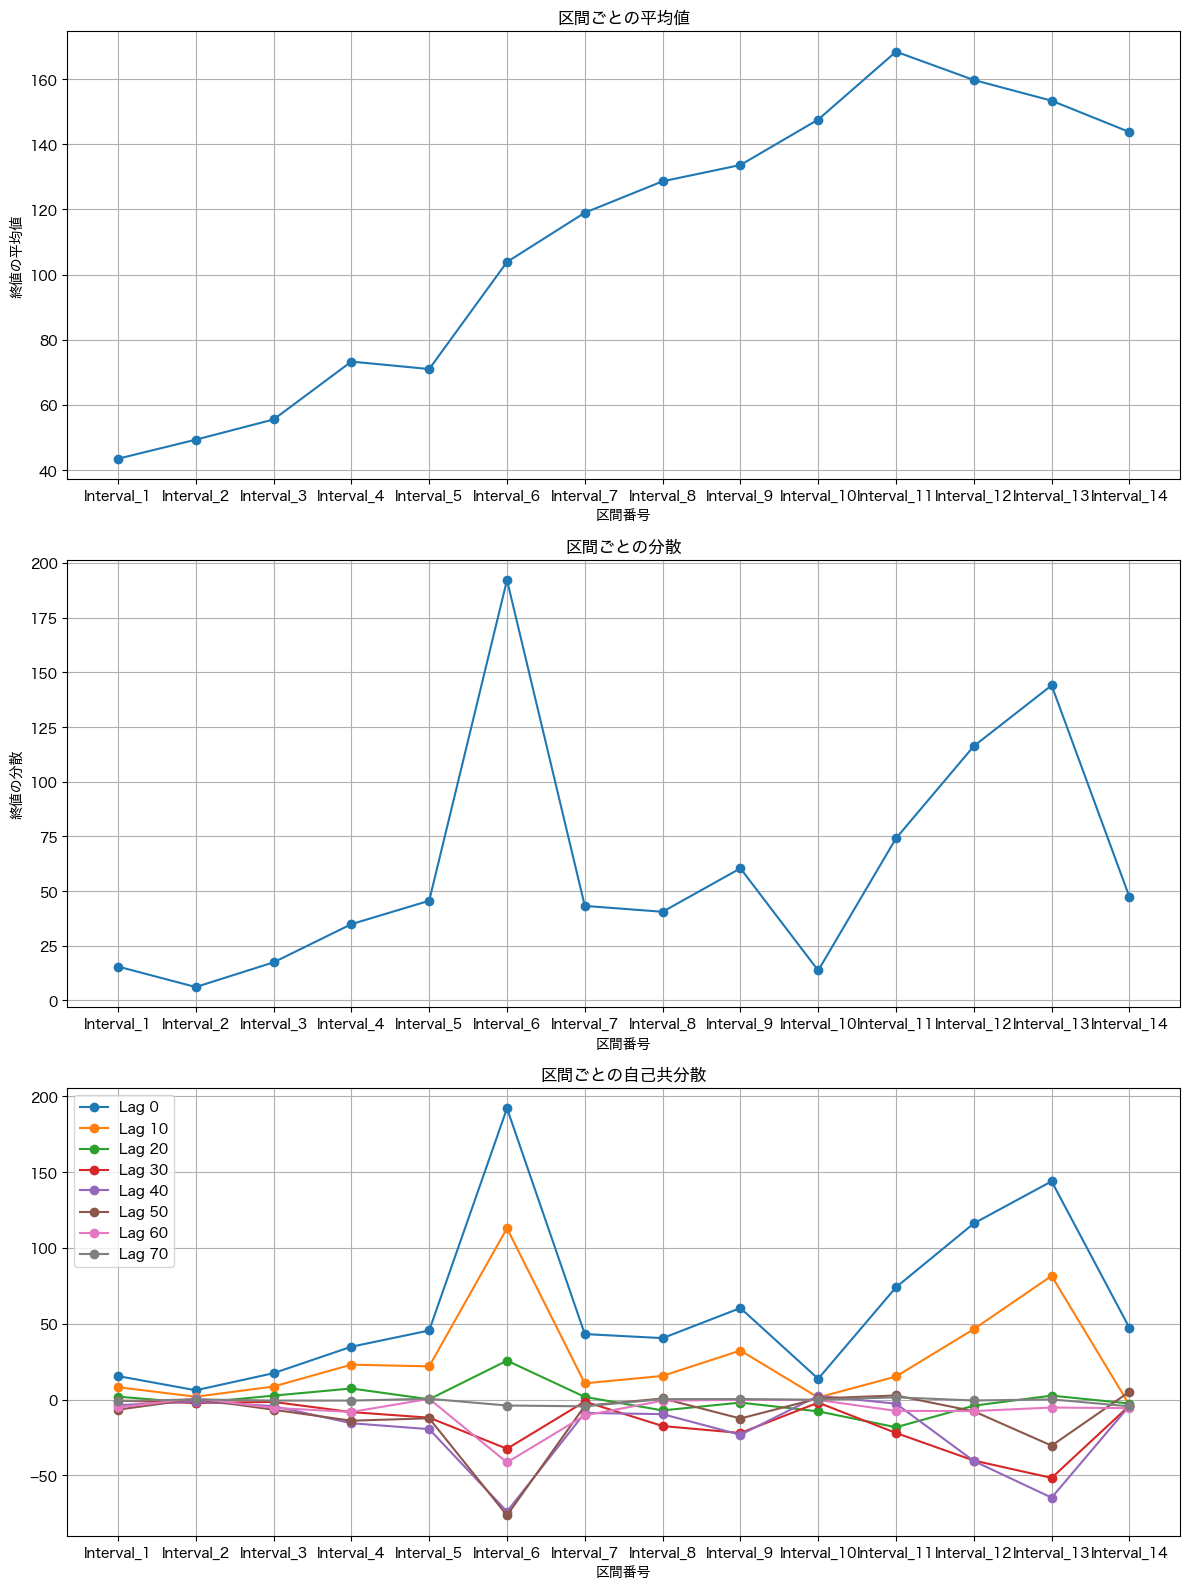

In [4]:
# 結果を可視化
fig, axes = plt.subplots(3, 1, figsize=(12, 16))

# 平均値のグラフ
axes[0].plot(results_df.index, results_df['Mean'], marker='o', linestyle='-')
axes[0].set_title('区間ごとの平均値')
axes[0].set_xlabel('区間番号')
axes[0].set_ylabel('終値の平均値')
axes[0].grid(True)

# 分散のグラフ
axes[1].plot(results_df.index, results_df['Variance'], marker='o', linestyle='-')
axes[1].set_title('区間ごとの分散')
axes[1].set_xlabel('区間番号')
axes[1].set_ylabel('終値の分散')
axes[1].grid(True)

# 自己共分散のグラフ
for lag in lags:
    axes[2].plot(results_df.index, results_df[f'Autocovariance_Lag_{lag}'], marker='o', linestyle='-', label=f'Lag {lag}')
axes[2].set_title('区間ごとの自己共分散')
axes[2].set_xlabel('区間番号')
axes[2].set_ylabel('')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()


3. 課題 2. を解答すると、区間によって、平均値、分散、自己共分散が大きく異なることがわかる。このような時系列は、非定常過程と呼ばれる。時系列が定常過程かどうかを示すいくつかの指標（たとえば augmented Dickey-Fuller test; ADF 検定など）を調べ、実際に計算して Apple の株価が非定常過程であることを示せ。

解答例

<img src="figs/5.jpg" width="900px">

In [5]:
from statsmodels.tsa.stattools import adfuller

# 終値のデータを取得
close_price = df_aapl['Close']

# Augmented Dickey-Fuller (ADF) テストを実施
adf_result = adfuller(close_price)

# ADF テストの結果を表示
adf_output = pd.Series(adf_result[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_result[4].items():
    adf_output[f'Critical Value ({key})'] = value

adf_output


Test Statistic                   -1.681306
p-value                           0.440769
#Lags Used                        1.000000
Number of Observations Used    1006.000000
Critical Value (1%)              -3.436867
Critical Value (5%)              -2.864417
Critical Value (10%)             -2.568302
dtype: float64

## 結果の解釈
p-value（確率値）: この値が0.05より大きい（ここでは0.44）場合、
帰無仮説（データが非定常である）を棄却できません。すなわち、この時系列は非定常である可能性が高い。

Test Statistic vs Critical Values: テスト統計量（-1.6813）が
各信頼区間（1%, 5%, 10%）の臨界値よりも大きい。これも帰無仮説を棄却できないことを示している。

以上の結果から、Appleの株価は非定常過程であると言える。
平均、分散、自己共分散が時間によって変動する特性と一致している